In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
x = list(np.arange(-3, 3, 0.1).round(2))
x

[-3.0,
 -2.9,
 -2.8,
 -2.7,
 -2.6,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.1,
 -2.0,
 -1.9,
 -1.8,
 -1.7,
 -1.6,
 -1.5,
 -1.4,
 -1.3,
 -1.2,
 -1.1,
 -1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9]

In [44]:
y = [-1.5 + 2*x_val + np.random.normal(0,1) for x_val in x] # list comprehension

Text(0.5, 1.0, 'y = 2x - 1.5')

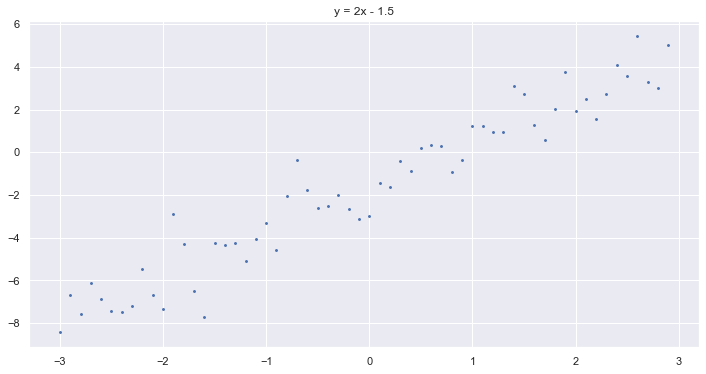

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(x,y, s=3.5)
plt.title('y = 2x - 1.5')

In [46]:
### Let's give outselves the ability to make a line, i.e. "prediction"

In [47]:
def make_line(x:list, slope, intercept):
    # slope = w1
    # intercept = w0
    ypred = [slope*x_val + intercept for x_val in x]
    return ypred


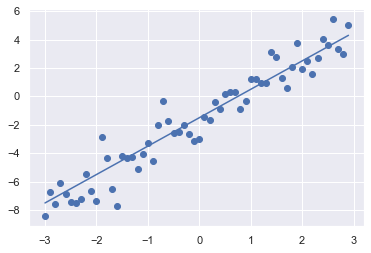

In [48]:
plt.scatter(x,y)
plt.plot(x, make_line(x, 2, -1.5))

### Let's start with an (intentially) bad predictions

In [49]:
bad_first_guess = make_line(x, -3, 2)

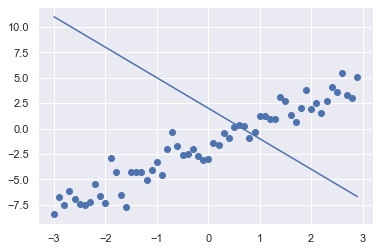

In [50]:
plt.scatter(x,y)
plt.plot(x, bad_first_guess)

### We need a loss function to tell us how bad the line is!

In [53]:
def mse(ytrue:list, ypred):
    
#     sr_list[]
#     for yt, yp in zip(ytrue, ypred):
#         squared_res = (yt - yp)**2
#         sr_list.append(squared_res)
        
    # in one line
    squared_residuals = [(yt- yp)**2 for yt, yp in zip(ytrue, ypred)]  
    error = np.mean(squared_residuals)
    return error

In [54]:
mse(y, bad_first_guess)

93.88506025687887

In [55]:
mse(y, make_line(x, 2, -1.5))

1.0942623713455382

In [68]:
def calc_gradient(x, ytrue, slope, intercept):
    

    dw = 0.0001
    ypred = make_line(x, slope, intercept)

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and slope_change
    ypred_slope = make_line(x, slope_change, intercept) # what would the pred be if i made the slope a little bit higher
    # we ONLY tweak the slope (first parameter here)
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ypred, ypred)) / dw    # derivative is the rate of change ; first oder derivative

    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using intercept_change and slope
    ypred_intercept = make_line(x, slope_change, intercept) # we ONLY tweak the intercept (second parameter)
    deriv_slope = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_slope] # return both derivations as a list


In [69]:
calc_gradient(x, y, -3, 2)

[-30.972159457149928, -30.972159457149928]